In [7]:

import pandas as pd



from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# read data and put it in a dataframe
# spreadsheet = gc.open_by_url('/content/drive/MyDrive/My Food Diary.gsheet')
spreadsheet = gc.open('My Food Diary')
worksheet = spreadsheet.get_worksheet(1)
worksheet



food = pd.DataFrame(worksheet.get_all_records())



In [8]:
food.head()

,Day,Category,Ingredient,Link
0,1/31/2022,Morning Drink,Coffee,
1,1/31/2022,Breakfast,Spiced Cherry Granola Bar,https://meals.richroll.com/recipe/5c9a6fe6ebb6...
2,1/31/2022,Snack,Lily's Dark Chocolate,https://lilys.com/products/sea-salt
3,1/31/2022,Snack,Peanut Butter,
4,1/31/2022,Dinner,Ravioli,


✅ Connected Food Diary

## Next: Clean Food Diary

- Pull out Source column based on anything found before a colon

- Pull out ingredients based on tokenizing the rest by semi-colon


In [9]:
food.describe()

,Day,Category,Ingredient,Link
count,525,525,525,525
unique,66,7,319,6
top,3/15/2022,Snack,Coffee,
freq,13,200,40,520


In [27]:
len(food['Ingredient'][10].split(':'))

1

In [54]:
firstStep = [[i, len(food.Ingredient[i].split(':')), food.Ingredient[i].split(':')] for i in range(0, len(food))]

In [55]:
firstStep[0]

[0, 1, ['Coffee']]

In [56]:
fs_df = pd.DataFrame(data=firstStep, columns=['row', 'number of args', 'values'])

In [57]:
fs_df

,row,number of args,values
0,0,1,[Coffee]
1,1,1,[Spiced Cherry Granola Bar]
2,2,1,[Lily's Dark Chocolate]
3,3,1,[Peanut Butter]
4,4,1,[Ravioli]
...,...,...,...
520,520,1,[Coffee; collagen]
521,521,2,"[Kodiak cakes, pancakes; lily's chocolate chi..."
522,522,1,[Papaya]
523,523,1,[Mandarin orange]


In [58]:
fs_df['Source'] = [None if fs_df['number of args'][i] == 1 else fs_df['values'][i][0] for i in range(0, len(fs_df))]

In [59]:
fs_df['values'][521][1:]

[" pancakes; lily's chocolate chips; banana"]

In [60]:
fs_df['Ingredients'] = [fs_df['values'][i][0] if fs_df['number of args'][i] == 1 else fs_df['values'][i][1:] for i in range(0, len(fs_df))]

In [61]:
fs_df

,row,number of args,values,Source,Ingredients
0,0,1,[Coffee],None,Coffee
1,1,1,[Spiced Cherry Granola Bar],None,Spiced Cherry Granola Bar
2,2,1,[Lily's Dark Chocolate],None,Lily's Dark Chocolate
3,3,1,[Peanut Butter],None,Peanut Butter
4,4,1,[Ravioli],None,Ravioli
...,...,...,...,...,...
520,520,1,[Coffee; collagen],None,Coffee; collagen
521,521,2,"[Kodiak cakes, pancakes; lily's chocolate chi...",Kodiak cakes,[ pancakes; lily's chocolate chips; banana]
522,522,1,[Papaya],None,Papaya
523,523,1,[Mandarin orange],None,Mandarin orange


In [67]:
fs_df['IngredientsStrings'] = ["".join(fs_df['Ingredients'][i]) for i in range(0, len(fs_df))]

In [68]:
fs_df

,row,number of args,values,Source,Ingredients,IngredientsStrings
0,0,1,[Coffee],None,Coffee,Coffee
1,1,1,[Spiced Cherry Granola Bar],None,Spiced Cherry Granola Bar,Spiced Cherry Granola Bar
2,2,1,[Lily's Dark Chocolate],None,Lily's Dark Chocolate,Lily's Dark Chocolate
3,3,1,[Peanut Butter],None,Peanut Butter,Peanut Butter
4,4,1,[Ravioli],None,Ravioli,Ravioli
...,...,...,...,...,...,...
520,520,1,[Coffee; collagen],None,Coffee; collagen,Coffee; collagen
521,521,2,"[Kodiak cakes, pancakes; lily's chocolate chi...",Kodiak cakes,[ pancakes; lily's chocolate chips; banana],pancakes; lily's chocolate chips; banana
522,522,1,[Papaya],None,Papaya,Papaya
523,523,1,[Mandarin orange],None,Mandarin orange,Mandarin orange


In [69]:
food.head()

,Day,Category,Ingredient,Link
0,1/31/2022,Morning Drink,Coffee,
1,1/31/2022,Breakfast,Spiced Cherry Granola Bar,https://meals.richroll.com/recipe/5c9a6fe6ebb6...
2,1/31/2022,Snack,Lily's Dark Chocolate,https://lilys.com/products/sea-salt
3,1/31/2022,Snack,Peanut Butter,
4,1/31/2022,Dinner,Ravioli,


In [70]:
food.index

RangeIndex(start=0, stop=525, step=1)

In [71]:
fs_df.index

RangeIndex(start=0, stop=525, step=1)

In [72]:
food.join(fs_df, how="inner")

,Day,Category,Ingredient,Link,row,number of args,values,Source,Ingredients,IngredientsStrings
0,1/31/2022,Morning Drink,Coffee,,0,1,[Coffee],None,Coffee,Coffee
1,1/31/2022,Breakfast,Spiced Cherry Granola Bar,https://meals.richroll.com/recipe/5c9a6fe6ebb6...,1,1,[Spiced Cherry Granola Bar],None,Spiced Cherry Granola Bar,Spiced Cherry Granola Bar
2,1/31/2022,Snack,Lily's Dark Chocolate,https://lilys.com/products/sea-salt,2,1,[Lily's Dark Chocolate],None,Lily's Dark Chocolate,Lily's Dark Chocolate
3,1/31/2022,Snack,Peanut Butter,,3,1,[Peanut Butter],None,Peanut Butter,Peanut Butter
4,1/31/2022,Dinner,Ravioli,,4,1,[Ravioli],None,Ravioli,Ravioli
...,...,...,...,...,...,...,...,...,...,...
520,8/14/2022,Morning Drink,Coffee; collagen,,520,1,[Coffee; collagen],None,Coffee; collagen,Coffee; collagen
521,8/14/2022,Breakfast,Kodiak cakes: pancakes; lily's chocolate chips...,,521,2,"[Kodiak cakes, pancakes; lily's chocolate chi...",Kodiak cakes,[ pancakes; lily's chocolate chips; banana],pancakes; lily's chocolate chips; banana
522,8/14/2022,Snack,Papaya,,522,1,[Papaya],None,Papaya,Papaya
523,8/14/2022,Snack,Mandarin orange,,523,1,[Mandarin orange],None,Mandarin orange,Mandarin orange


In [80]:
foodDF = food.join(fs_df, how="inner")[['Day', 'Category', 'Link', 'Source', 'IngredientsStrings', 'row']]

In [81]:
foodDF

,Day,Category,Link,Source,IngredientsStrings,row
0,1/31/2022,Morning Drink,,None,Coffee,0
1,1/31/2022,Breakfast,https://meals.richroll.com/recipe/5c9a6fe6ebb6...,None,Spiced Cherry Granola Bar,1
2,1/31/2022,Snack,https://lilys.com/products/sea-salt,None,Lily's Dark Chocolate,2
3,1/31/2022,Snack,,None,Peanut Butter,3
4,1/31/2022,Dinner,,None,Ravioli,4
...,...,...,...,...,...,...
520,8/14/2022,Morning Drink,,None,Coffee; collagen,520
521,8/14/2022,Breakfast,,Kodiak cakes,pancakes; lily's chocolate chips; banana,521
522,8/14/2022,Snack,,None,Papaya,522
523,8/14/2022,Snack,,None,Mandarin orange,523


In [84]:
foodDF_long = (foodDF.set_index(['Day', 'Category', 'Link', 'Source','row'])
   .apply(lambda x: x.str.split(';').explode())
   .reset_index())    

In [85]:
foodDF_long

,Day,Category,Link,Source,row,IngredientsStrings
0,1/31/2022,Morning Drink,,NaN,0,Coffee
1,1/31/2022,Breakfast,https://meals.richroll.com/recipe/5c9a6fe6ebb6...,NaN,1,Spiced Cherry Granola Bar
2,1/31/2022,Snack,https://lilys.com/products/sea-salt,NaN,2,Lily's Dark Chocolate
3,1/31/2022,Snack,,NaN,3,Peanut Butter
4,1/31/2022,Dinner,,NaN,4,Ravioli
...,...,...,...,...,...,...
819,8/14/2022,Lunch,,NaN,524,Chicken
820,8/14/2022,Lunch,,NaN,524,zucchini
821,8/14/2022,Lunch,,NaN,524,yellow squash
822,8/14/2022,Lunch,,NaN,524,onion


In [88]:
foodDF_long.IngredientsStrings.plot.pie()

TypeError: ignored

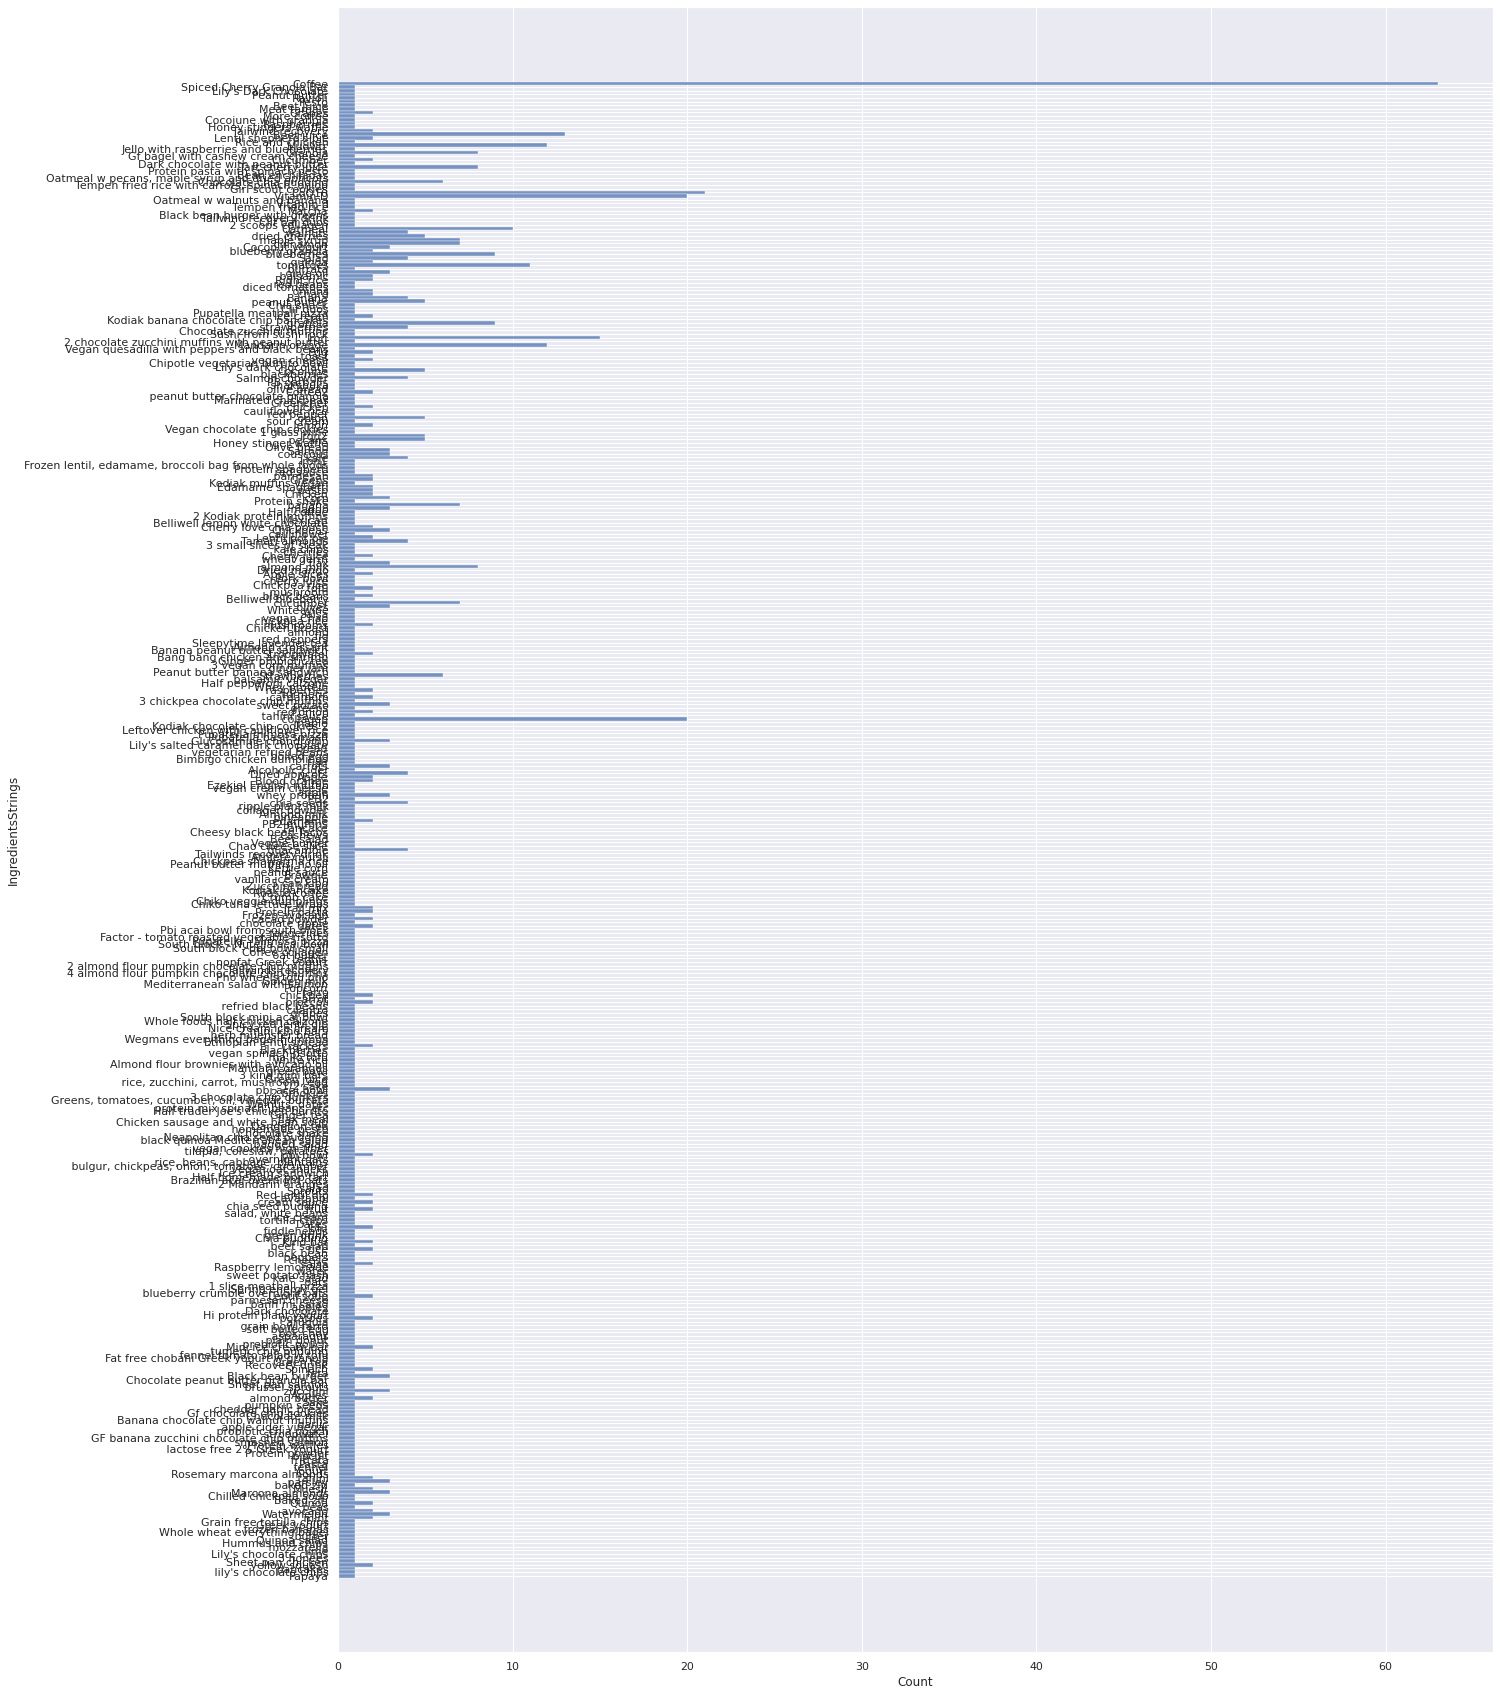

In [95]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20.7,30.27)})
sns.histplot(foodDF_long, y="IngredientsStrings")